In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Analyse missing values

data = pd.read_csv('prepared_data.csv', sep='\t', index_col=0)
print(data.isna().sum())
pd.set_option('use_inf_as_na',True)
data = data.dropna(how='any')

print(data.isna().sum())

error_rate           0
avg_char_duration    0
screen_size          0
swipe_finger         1
dtype: int64
error_rate           0
avg_char_duration    0
screen_size          0
swipe_finger         0
dtype: int64


<AxesSubplot:title={'center':'frequencies screen surface'}>

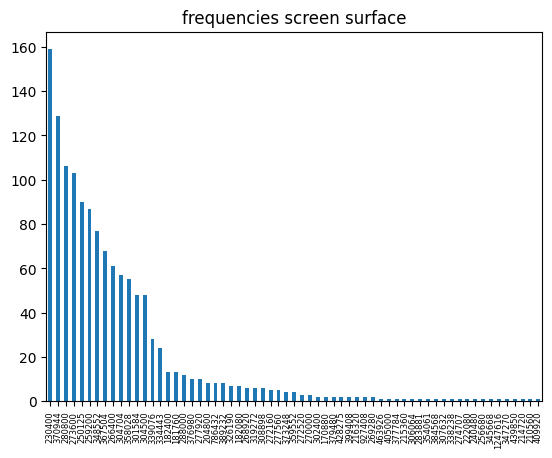

In [3]:

size = data["screen_size"]
fig, ax = plt.subplots()
plt.title("frequencies screen surface")
plt.xticks(fontsize=6)
data['screen_size'].value_counts().plot(ax=ax, kind='bar')

***Analyse Outliers***

In [4]:
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers
find_outliers_IQR(data['screen_size'])

uid
0v1dljhskkp96ljbongsf95mm2     927408
6jfstctlbeba7felvi99mbjg98     786432
78inknvjp2cjp3gmbfms0u9dlt     786432
7bv31t3k9b425a8nnvik05558c     786432
8d1sgb789q9uteu6ac8lrpkf9a     927408
8i24ds4t3bo0g6ng6la8kklf6o    1247616
8s6ud2pbh0d8k6cudsr2ub2otg     786432
9v10oe3mb5dce5bcsc6aco16l0     786432
cr8e9djnor2v9p9udb6t3akmlv     786432
m19kp6kv22lnksntjptpuusbqj     786432
pl69ut44cbvmffdk3c18f19ptp     786432
Name: screen_size, dtype: int64

In [5]:
find_outliers_IQR(data['avg_char_duration']).sort_values()

uid
lvf3et9qkfngfqjsdrie8oamlt    1.043808e+03
f8e67an8t8fs79abdiba72hbev    1.063494e+03
hh4bv0fg35l2e0i595rl29juip    1.070497e+03
hjgq6ugun93f0v756jc8h1jec6    1.091280e+03
gnu23tgarn4o8dmr3mee1bgksv    1.105661e+03
                                  ...     
ctimcfb2lmrrn5s24994682vma    1.936015e+05
audc7tlc2ck4m6n09pkc46rvgj    2.238747e+05
ir8jqislt00b04b3lmb7v1g6rj    2.330918e+05
0069j4rbe1si9pjqgfhks8sprm    4.512703e+05
mmv95ln59eb47o26drldkjc82d    6.901384e+06
Name: avg_char_duration, Length: 209, dtype: float64

In [6]:

find_outliers_IQR(data['error_rate']).sort_values()

uid
5p36qvohrubi0glbfa2sps6kev     0.538462
gnu23tgarn4o8dmr3mee1bgksv     0.545455
crrtpk003307cb809eiujdnr97     0.545455
ohk3ohneptdg0sob2djh7e1p19     0.545455
2lssnjt9tnkadurns46bvtf268     0.550000
                                ...    
voqrtbk1p57i27u59n5hnkqju6    20.900000
bi6vbeqsnhn16ln94rqe97om1o    27.000000
88p5pbhel0gq0j4faqc66412l7    27.000000
qgr0mcjh3t7bep6c6sac88g967    28.250000
9o4j6ek6puc2nsuur5rclkb21c    36.000000
Name: error_rate, Length: 123, dtype: float64

***Graphs***

In [7]:
data['swipe_finger'].unique()


array(['Thumb', 'Index', 'Other'], dtype=object)

In [8]:
# Average error rate of used fingers for typing
thumb_error = data[data['swipe_finger'] == "Thumb"]['error_rate'].mean()
thumb_error_sd = data[data['swipe_finger'] == "Thumb"]['error_rate'].std()

index_error = data[data['swipe_finger'] == "Index"]['error_rate'].mean()
index_error_sd = data[data['swipe_finger'] == "Index"]['error_rate'].std()

other_error = data[data['swipe_finger'] == "Other"]['error_rate'].mean()
other_error_sd = data[data['swipe_finger'] == "Other"]['error_rate'].std()

print("Mean error rate of thumb is:", thumb_error)
print("Mean error rate of index is:", index_error)
print("Mean error rate of other fingers is:", other_error)

Mean error rate of thumb is: 0.48722870121796175
Mean error rate of index is: 0.47651045811655673
Mean error rate of other fingers is: 0.33246719006639697


Text(0.5, 0.98, 'Different plotting styles of mean error rate by finger used')

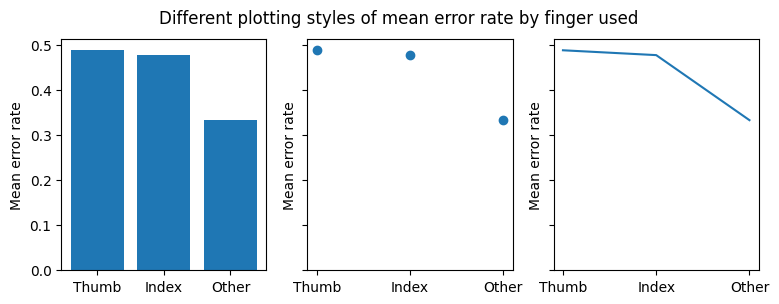

In [9]:
names = ["Thumb", "Index", "Other"]
values = [thumb_error, index_error, other_error]
sd = [thumb_error_sd, index_error_sd, other_error_sd]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax1.bar(names, values)
ax1.set_ylabel("Mean error rate")

ax2.scatter(names, values)
ax2.set_ylabel("Mean error rate")

ax3.plot(names, values)
ax3.set_ylabel("Mean error rate")

fig.suptitle('Different plotting styles of mean error rate by finger used')

In [10]:
# Average error rate of used fingers for typing
thumb_duration = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].mean()
thumb_duration_sd = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].std()

index_duration = data[data['swipe_finger'] == "Index"]['avg_char_duration'].mean()
index_duration_sd = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].std()

other_duration = data[data['swipe_finger'] == "Other"]['avg_char_duration'].mean()
other_duration_sd = data[data['swipe_finger'] == "Thumb"]['avg_char_duration'].std()

print("Average character duration of thumb is:", thumb_duration)
print("Average character duration of index is:", index_duration)
print("Average character duration of other fingers is:", other_duration)

Average character duration of thumb is: 10073.334088895417
Average character duration of index is: 2726.3631182259246
Average character duration of other fingers is: 4367.352348872661


Text(0.5, 0.98, 'Different plotting styles of mean duration per character by finger used')

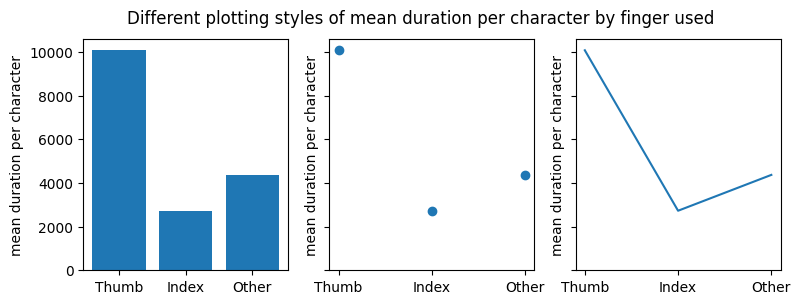

In [11]:
names = ["Thumb", "Index", "Other"]
values = [thumb_duration, index_duration, other_duration]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

ax1.bar(names, values)
ax1.set_ylabel("mean duration per character")

ax2.scatter(names, values)
ax2.set_ylabel("mean duration per character")

ax3.plot(names, values)
ax3.set_ylabel("mean duration per character")

fig.suptitle('Different plotting styles of mean duration per character by finger used')